In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns


C:\Users\rawat\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


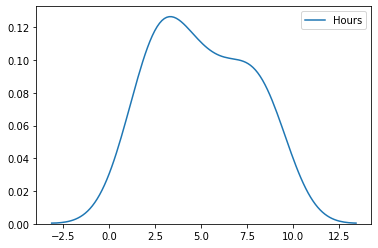

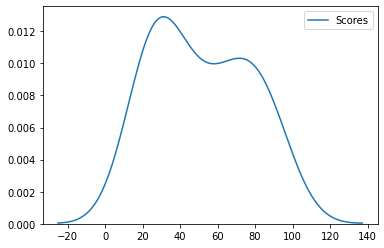

In [8]:
for i in df:
    sns.kdeplot(df[i])
    plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

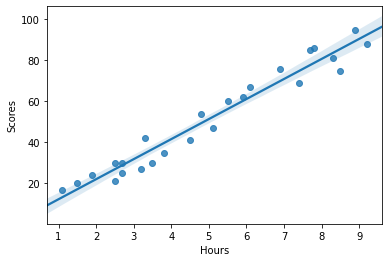

In [10]:
sns.regplot(x="Hours",y="Scores",data=df)
# we can see a strong positive relation


In [12]:
y=df["Scores"]
x=df.drop("Scores",axis=1)

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=3) 

In [14]:
    
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [17]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [19]:
print(f'R^2 score for train: {r2_score(y_train, y_pred_train)}')
print(f'R^2 score for test: {r2_score(y_test, y_pred_test)}')
print("RMSE of traning data",np.sqrt(mean_squared_error(x_train,y_pred_train)))
print("RMSE of test data",np.sqrt(mean_squared_error(x_test,y_pred_test)))

R^2 score for train: 0.9507549075691762
R^2 score for test: 0.9452617628334009
RMSE of traning data 49.09097067180191
RMSE of test data 55.00086647513738


In [20]:
## RANDOM fOREST
rf=RandomForestRegressor(random_state=3)



rf.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [21]:
r2_test = r2_score(y_test, rf.predict(x_test))
r2_train = r2_score(y_train, rf.predict(x_train))
r2_train,r2_test

(0.9828031494581505, 0.9191389199265353)

In [27]:
# Linier Regression is giving good results
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df1 

,Actual,Predicted
18,67,61.072402
17,24,21.181131
12,41,45.875727
23,76,68.670739
15,95,87.666582


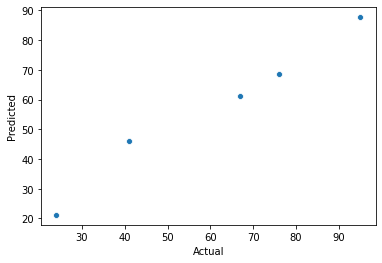

In [28]:
sns.scatterplot(x="Actual",y="Predicted",data=df1)
plt.show()